#### [PREV](4.OOP_Logistic_Regression.ipynb) | [HOME](../README.md) | [NEXT](6.OOP_Neural_Network_Adv.ipynb)


#  Neural Network Linear Regression: Simple approach

This guide trains a neural network model perform Linear Regression on the same [insects](data\insects.csv) you have been using. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Step 2: Import The Data

In [46]:
insects = pd.read_csv('./data/insects.csv', sep='\t')

#### Step 3: Split The Data into Training And Testing Sets

In [47]:
X_insects = insects[['continent', 'latitude', 'sex']]
y_insects = insects['wingsize']

X_train, X_test, y_train, y_test = train_test_split(X_insects, y_insects, test_size=0.5, random_state=42)

Text(0, 0.5, 'Wing Span')

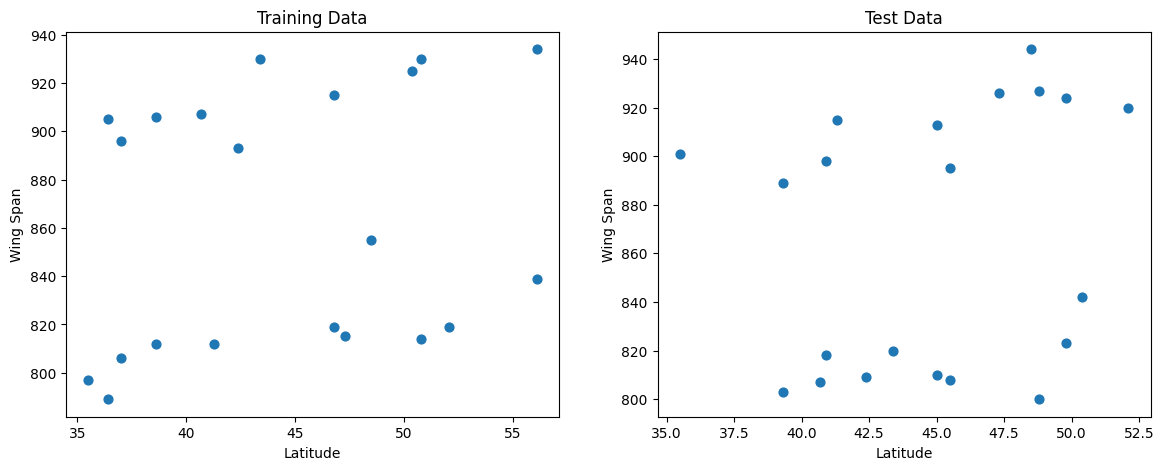

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_train[['latitude']], y_train, s=40)
axs[0].set_title("Training Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Wing Span")


axs[1].scatter(X_test[['latitude']], y_test, s=40)
axs[1].set_title("Test Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Wing Span")

#### Step 4: Instantiate a Neural Network Object And Configure The Layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [49]:
model = keras.Sequential([
    layers.Input(shape=(0,1)),        # Input layer
    layers.Dense(3, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(4, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(2, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)                  # Output layer with a single neuron (for regression)
])

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### Step 5: Fit The Model

Fitting (Training) the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


In [55]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=100, batch_size=3, validation_data=(X_test, y_test))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 437635.3125 - val_loss: 445158.4688
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 422375.2500 - val_loss: 444781.8125
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 437896.4062 - val_loss: 444398.7188
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 448856.0000 - val_loss: 444018.3750
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 459450.5938 - val_loss: 443634.2500
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 432869.0000 - val_loss: 443249.9062
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 448322.2188 - val_loss: 442859.1562
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 460572.5625 - val_loss: 442470.8438
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 449362.0000 - val_loss: 442078.4375
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 446009.5938 - val_loss: 441679.7188
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 

#### Step 6: Evaluate The Model

In [52]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 445542.7500
Test Loss: 445542.7500


### Step 7: Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [53]:
# Use the trained model to make predictions on new data
new_data = np.array([[1], [38], [0]])
predictions = model.predict(new_data)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
[[[ 63.67078]]

 [[781.12695]]

 [[ 44.28007]]]


#### Step 8: Plot the Predictions

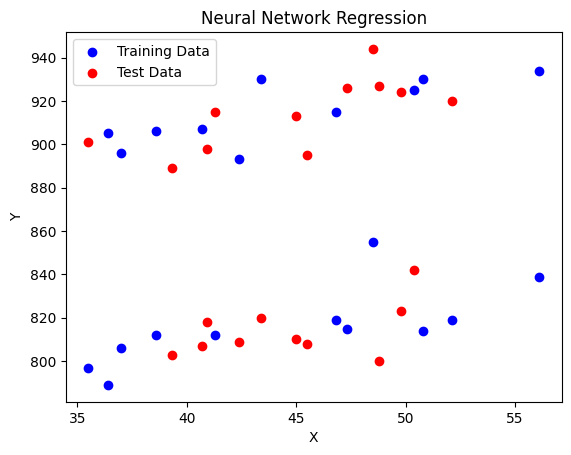

In [54]:
# Plot the actual data and model predictions
plt.scatter(X_train[['latitude']], y_train, label='Training Data', color='blue')
plt.scatter(X_test[['latitude']], y_test, label='Test Data', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

In [70]:
print(model.predict(X_train))
table = pd.DataFrame({
    'Target': y_train,
    'Predicted result': model.predict(X_train),
    'Loss': y_train - model.predict(X_train).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[[ 130.20808]
  [ 884.75494]
  [ 111.9823 ]]

 [[ 111.9823 ]
  [ 775.40027]
  [ 111.9823 ]]

 [[ 111.9823 ]
  [1061.5448 ]
  [ 130.20808]]

 [[ 130.20808]
  [ 786.3357 ]
  [ 111.9823 ]]

 [[ 130.20808]
  [1037.8513 ]
  [ 130.20808]]

 [[ 130.20808]
  [ 758.99713]
  [ 130.20808]]

 [[ 130.20808]
  [ 815.49695]
  [ 111.9823 ]]

 [[ 111.9823 ]
  [ 775.40027]
  [ 130.20808]]

 [[ 111.9823 ]
  [1134.4479 ]
  [ 130.20808]]

 [[ 130.20808]
  [ 853.7711 ]
  [ 111.9823 ]]

 [[ 111.9823 ]
  [ 974.06116]
  [ 130.20808]]

 [[ 130.20808]
  [ 815.49695]
  [ 130.20808]]

 [[ 111.9823 ]
  [ 864.7065 ]
  [ 130.20808]]

 [[ 130.20808]
  [1037.8513 ]
  [ 111.9823 ]]

 [[ 130.20808]
  [ 786.3357 ]
  [ 130.20808]]

 [[ 111.9823 ]
  [1030.561  ]
  [ 111.9823 ]]

 [[ 111.9823 ]
  [1134.4479 ]
  [ 111.9823 ]]

 [[ 130.20808]
  [ 964.94824]
  [ 111.9823 ]]

 [[ 111.9823 ]
  [ 902.9807 ]
  [ 111.9823 ]]

 [[ 130.20808]
  [ 964.94824]
  [ 130.20808]]

 [[ 111.9823 ]
  [ 995

ValueError: Data must be 1-dimensional, got ndarray of shape (21, 3, 21) instead